In [1]:
! pip3 install requests

## Get方法

In [30]:
import requests
res = requests.get("https://s.taobao.com/search?q=%E7%94%B7%E5%8F%8B%E8%A4%B2&type=p&tmhkh5=&spm=a21wu.241046-tw.a2227oh.d100&from=sea_1_searchbutton&catId=100")


<!DOCTYPE html>
<html lang="zh-CN">
<head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="renderer" content="webkit">
    <meta name="data-spm" content="a230r">
    <link rel="dns-prefetch" href="//g.alicdn.com">
    <link rel="dns-prefetch" href="//assets.alicdn.com">
    <link rel="dns-prefetch" href="//img.alicdn.com">
    <link rel="dns-prefetch" href="//g-search1.alicdn.com">
    <link rel="dns-prefetch" href="//g-search2.alicdn.com">
    <link rel="dns-prefetch" href="//g-search3.alicdn.com">
    <link rel="dns-prefetch" href="//g-search4.alicdn.com">
    <link rel="dns-prefetch" href="//gtms01.alicdn.com">
    <link rel="dns-prefetch" href="//gtms02.alicdn.com">
    <link rel="dns-prefetch" href="//gtms03.alicdn.com">
    <link rel="dns-prefetch" href="//gtms04.alicdn.com">
    <meta name="description" content="淘宝搜索是最智能的商品搜索引擎，通过大数据的运营，准确的理解商品与用户，提供精准的个性化搜索体验。">
            <meta name="keywords" content="男友褲,男友褲_淘宝网,男友褲_淘宝搜索
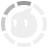

In [31]:
print (res.text)

In [32]:
res.text[:100]

'\r\n<!DOCTYPE html>\n<html lang="zh-CN">\n<head>\n    <meta charset="UTF-8">\n    <meta http-equiv="X-UA-C'

In [33]:
with open('taobao.html', 'w') as f:
    f.write(res.text)

In [34]:
with open('taobao.html', 'r') as f:
    print (f.read(100))


<!DOCTYPE html>
<html lang="zh-CN">
<head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Co


## BS4

In [7]:
! pip3 install BeautifulSoup4

  Using cached beautifulsoup4-4.6.0-py3-none-any.whl


In [8]:
from bs4 import BeautifulSoup

In [35]:
html_sample ='\
<html>\
<body>\
<h1 id="title">Hello World</h1>\
<a href ="#" class ="link"> This is link1 </a>\
<a href ="# link2" class ="link"> This is link2 </a>\
</body>\
</html>'

In [36]:
soup = BeautifulSoup(html_sample)

/usr/local/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html5lib")

  markup_type=markup_type))


In [37]:
print (soup.text)

Hello World This is link1  This is link2 


In [38]:
print (soup.contents)

[<html><head></head><body><h1 id="title">Hello World</h1><a class="link" href="#"> This is link1 </a><a class="link" href="# link2"> This is link2 </a></body></html>]


In [40]:
print (soup.select('h1')[0])

<h1 id="title">Hello World</h1>


In [41]:
print (soup.select('#title'))

[<h1 id="title">Hello World</h1>]


In [42]:
print (soup.select('.link'))

[<a class="link" href="#"> This is link1 </a>, <a class="link" href="# link2"> This is link2 </a>]


In [9]:
BeautifulSoup

bs4.BeautifulSoup

## POST 方法

In [14]:
import requests

In [15]:
#先把post內容用字典包起來(用key-value方法)
payload ={
'StartStation:2f940836-cedc-41ef-8e28-c2336ac8fe68',
'EndStation:f2519629-5973-4d08-913b-479cce78a356',
'SearchDate:2017/07/05',
'SearchTime:06:00',
'SearchWay:DepartureInMandarin'
}

In [21]:
#加上網址列，再把包裝後的字典放入data
res = requests.post("https://www.thsrc.com.tw/tw/TimeTable/SearchResult",
                    data = payload)

TypeError: a bytes-like object is required, not 'str'

In [17]:
print (res.text)

!function(){if(!(KISSY.UA.ie&&KISSY.UA.ie<8)){var r=/\w*.(?:pre.taobao.com|daily.taobao.net)/.test(location.href)?"/src/":"//g.alicdn.com/searchInteraction/keyword-brand-pc/0.0.6/";KISSY.config({packages:[{name:"keywordBrandPC",path:r,ignorePackageNameInUri:!0,debug:!0,combine:!1}]}),KISSY.config("modules",{"keywordBrandPC/_0":{requires:["keywordBrandPC/p/keyword-brand/index.css","json","node","overlay","keywordBrandPC/_1","cookie","tbc/mini-login/2.2.9/index"]},"keywordBrandPC/_1":{requires:["json"]},"keywordBrandPC/p/keyword-brand/index":{alias:"keywordBrandPC/_0"},"keywordBrandPC/p/keyword-brand/mtop":{alias:"keywordBrandPC/_1"}}),window.initKeywordBrandhb=function(r){r.status&&"show"===r.status&&r.data&&KISSY.use("keywordBrandPC/p/keyword-brand/",function(a,n){n.init(r.data)})}}}();


## 老師的方法

In [5]:
import requests

In [6]:
payload = """StartStation:2f940836-cedc-41ef-8e28-c2336ac8fe68
EndStation:f2519629-5973-4d08-913b-479cce78a356
SearchDate:2017/07/05
SearchTime:06:00
SearchWay:DepartureInMandarin"""

In [7]:
def str2dict(data_str):
    data = {}
    for row in data_str.split('\n'):
        kv_list = row.split(":")
        data[kv_list[0]] = kv_list[1]
    return data

In [8]:
data = str2dict(payload)

In [9]:
str2dict("""StartStation:2f940836-cedc-41ef-8e28-c2336ac8fe68
EndStation:f2519629-5973-4d08-913b-479cce78a356
SearchDate:2017/07/05
SearchTime:06:00
SearchWay:DepartureInMandarin""")

{'EndStation': 'f2519629-5973-4d08-913b-479cce78a356',
 'SearchDate': '2017/07/05',
 'SearchTime': '06',
 'SearchWay': 'DepartureInMandarin',
 'StartStation': '2f940836-cedc-41ef-8e28-c2336ac8fe68'}

In [10]:
res = requests.post("https://www.thsrc.com.tw/tw/TimeTable/SearchResult",
                    data = data)

In [11]:
print (res.text)



<!DOCTYPE html>
<html lang="zh-tw">



<meta charset="utf-8" />
<link rel="shortcut icon" href="/Content/favicon/favicon.ico" />
<link rel="apple-touch-icon-precomposed" href="/Content/favicon/57_57.png" sizes="57x57" />
<link rel="apple-touch-icon-precomposed" href="/Content/favicon/72_72.png" sizes="72x72" />
<link rel="apple-touch-icon-precomposed" href="/Content/favicon/76_76.png" sizes="76x76" />
<link rel="apple-touch-icon-precomposed" href="/Content/favicon/114_114.png" sizes="114x114" />
<link rel="apple-touch-icon-precomposed" href="/Content/favicon/120_120.png" sizes="120x120" />
<link rel="apple-touch-icon-precomposed" href="/Content/favicon/144_144.png" sizes="144x144" />
<link rel="apple-touch-icon-precomposed" href="/Content/favicon/152_152.png" sizes="152x152" />
<!--<meta name="viewport" content="width=device-width, initial-scale=1.0, user-scalable=no, minimum-scale=1.0, maximum-scale=1.0" />-->
<meta name="keywords" content="高鐵,快速,旅遊假期,遊玩">
<meta name="description" c

## BS4

In [1]:
!pip3 install lxml

In [12]:
from bs4 import BeautifulSoup

In [13]:
soup = BeautifulSoup(res.text, 'lxml')

In [14]:
soup

<!DOCTYPE html>
<html lang="zh-tw">
<head><meta charset="utf-8"/>
<link href="/Content/favicon/favicon.ico" rel="shortcut icon"/>
<link href="/Content/favicon/57_57.png" rel="apple-touch-icon-precomposed" sizes="57x57"/>
<link href="/Content/favicon/72_72.png" rel="apple-touch-icon-precomposed" sizes="72x72"/>
<link href="/Content/favicon/76_76.png" rel="apple-touch-icon-precomposed" sizes="76x76"/>
<link href="/Content/favicon/114_114.png" rel="apple-touch-icon-precomposed" sizes="114x114"/>
<link href="/Content/favicon/120_120.png" rel="apple-touch-icon-precomposed" sizes="120x120"/>
<link href="/Content/favicon/144_144.png" rel="apple-touch-icon-precomposed" sizes="144x144"/>
<link href="/Content/favicon/152_152.png" rel="apple-touch-icon-precomposed" sizes="152x152"/>
<!--<meta name="viewport" content="width=device-width, initial-scale=1.0, user-scalable=no, minimum-scale=1.0, maximum-scale=1.0" />-->
<meta content="高鐵,快速,旅遊假期,遊玩" name="keywords"/>
<meta content="台灣高鐵連結台灣南北主要城市，我們不

In [23]:
soup.select('table')

[<table>
 <tr>
 <th colspan="4" scope="col">車次資訊</th>
 <th colspan="1" scope="col">適用優惠</th>
 <th rowspan="2" scope="col">備註</th>
 </tr>
 <tr>
 <th class="column1" scope="col">車次</th>
 <th class="column3" scope="col">出發時間</th>
 <th class="column4" scope="col">抵達時間</th>
 <th class="column2" scope="col">行車時間</th>
 <th class="Width1" scope="col">早鳥</th>
 </tr>
 <tr>
 <td class="toTouch" colspan="7">
 <table class="touch_table"><tr>
 <td class="column1"><a href="?ID=U3RhcnRTdGF0aW9uPTJmOTQwODM2LWNlZGMtNDFlZi04ZTI4LWMyMzM2YWM4ZmU2OCZFbmRTdGF0aW9uPWYyNTE5NjI5LTU5NzMtNGQwOC05MTNiLTQ3OWNjZTc4YTM1NiZTZWFyY2hEYXRlPTIwMTcvMDcvMDUmU2VhcmNoVGltZT0wNiZTZWFyY2hXYXk9RGVwYXJ0dXJlSW5NYW5kYXJpbiZSZXN0VGltZT0mRWFybHlPckxhdGVyPSZTdGF0aW9uTGluZUN1cnJlbnQ9MDgwMw==" title="0803">0803</a></td>
 <td class="column3">06:15</td>
 <td class="column4">08:40</td>
 <td class="column2">02:25</td>
 <td class="Width1"> </td>
 <td> </td>
 </tr>
 </table>
 <div class="touch_show">
 <section class="touch_table_info touch_ta

In [26]:
soup.select(" table > tr > td")

[<td class="toTouch" colspan="7">
 <table class="touch_table"><tr>
 <td class="column1"><a href="?ID=U3RhcnRTdGF0aW9uPTJmOTQwODM2LWNlZGMtNDFlZi04ZTI4LWMyMzM2YWM4ZmU2OCZFbmRTdGF0aW9uPWYyNTE5NjI5LTU5NzMtNGQwOC05MTNiLTQ3OWNjZTc4YTM1NiZTZWFyY2hEYXRlPTIwMTcvMDcvMDUmU2VhcmNoVGltZT0wNiZTZWFyY2hXYXk9RGVwYXJ0dXJlSW5NYW5kYXJpbiZSZXN0VGltZT0mRWFybHlPckxhdGVyPSZTdGF0aW9uTGluZUN1cnJlbnQ9MDgwMw==" title="0803">0803</a></td>
 <td class="column3">06:15</td>
 <td class="column4">08:40</td>
 <td class="column2">02:25</td>
 <td class="Width1"> </td>
 <td> </td>
 </tr>
 </table>
 <div class="touch_show">
 <section class="touch_table_info touch_table_info_tw">
 <a class="touch_close" href="?ID=U3RhcnRTdGF0aW9uPTJmOTQwODM2LWNlZGMtNDFlZi04ZTI4LWMyMzM2YWM4ZmU2OCZFbmRTdGF0aW9uPWYyNTE5NjI5LTU5NzMtNGQwOC05MTNiLTQ3OWNjZTc4YTM1NiZTZWFyY2hEYXRlPTIwMTcvMDcvMDUmU2VhcmNoVGltZT0wNiZTZWFyY2hXYXk9RGVwYXJ0dXJlSW5NYW5kYXJpbiZSZXN0VGltZT0mRWFybHlPckxhdGVyPSZTdGF0aW9uTGluZUN1cnJlbnQ9" title="close">close</a>
 <h3><strong>080

In [28]:
for tr in soup.select("table > tr "):
    print(tr.text.strip())

車次資訊
適用優惠
備註
車次
出發時間
抵達時間
行車時間
早鳥
0803
06:15
08:40
02:25
 
 




close
0803 列車 停靠說明 

南港站06:15
台北站06:26
板橋站06:34
桃園站06:49
新竹站07:02
苗栗站07:13
台中站07:32
彰化站07:45
雲林站07:56
嘉義站08:10
台南站08:28
左營站08:40
0603
06:40
08:50
02:10
 
 




close
0603 列車 停靠說明 

南港站06:40
台北站06:51
板橋站07:00
桃園站07:15
新竹站07:27
苗栗站
台中站07:53
彰化站
雲林站
嘉義站08:19
台南站08:38
左營站08:50
0805
07:00
09:25
02:25
 
 




close
0805 列車 停靠說明 

南港站07:00
台北站07:11
板橋站07:19
桃園站07:34
新竹站07:47
苗栗站07:58
台中站08:17
彰化站08:30
雲林站08:41
嘉義站08:55
台南站09:13
左營站09:25
0109
07:20
09:05
01:45
 
 




close
0109 列車 停靠說明 

南港站07:20
台北站07:31
板橋站07:39
桃園站
新竹站
苗栗站
台中站08:20
彰化站
雲林站
嘉義站
台南站
左營站09:05
0609
07:35
09:45
02:10
 
 




close
0609 列車 停靠說明 

南港站07:35
台北站07:46
板橋站07:55
桃園站08:10
新竹站08:22
苗栗站
台中站08:48
彰化站
雲林站
嘉義站09:14
台南站09:33
左營站09:45
0205
07:40
09:30
01:50
 
 




close
0205 列車 停靠說明 

南港站07:40
台北站07:51
板橋站07:59
桃園站
新竹站
苗栗站
台中站08:40
彰化站
雲林站
嘉義站
台南站09:18
左營站09:30
0809
08:00
10:25
02:25
 
 




close
0809 列車 停靠說明 

南港站08:00
台北站08:11
板橋站08:19
桃園站08:34
新竹站08:47
苗栗站0

In [29]:
for td in soup.select(" table > tr"):
    for field in td.select('td'):
        print(" ".join(field.text.strip().split()))
    print("=="*50)

0803 06:15 08:40 02:25 close 0803 列車 停靠說明 南港站06:15 台北站06:26 板橋站06:34 桃園站06:49 新竹站07:02 苗栗站07:13 台中站07:32 彰化站07:45 雲林站07:56 嘉義站08:10 台南站08:28 左營站08:40
0803
06:15
08:40
02:25


0603 06:40 08:50 02:10 close 0603 列車 停靠說明 南港站06:40 台北站06:51 板橋站07:00 桃園站07:15 新竹站07:27 苗栗站 台中站07:53 彰化站 雲林站 嘉義站08:19 台南站08:38 左營站08:50
0603
06:40
08:50
02:10


0805 07:00 09:25 02:25 close 0805 列車 停靠說明 南港站07:00 台北站07:11 板橋站07:19 桃園站07:34 新竹站07:47 苗栗站07:58 台中站08:17 彰化站08:30 雲林站08:41 嘉義站08:55 台南站09:13 左營站09:25
0805
07:00
09:25
02:25


0109 07:20 09:05 01:45 close 0109 列車 停靠說明 南港站07:20 台北站07:31 板橋站07:39 桃園站 新竹站 苗栗站 台中站08:20 彰化站 雲林站 嘉義站 台南站 左營站09:05
0109
07:20
09:05
01:45


0609 07:35 09:45 02:10 close 0609 列車 停靠說明 南港站07:35 台北站07:46 板橋站07:55 桃園站08:10 新竹站08:22 苗栗站 台中站08:48 彰化站 雲林站 嘉義站09:14 台南站09:33 左營站09:45
0609
07:35
09:45
02:10


0205 07:40 09:30 01:50 close 0205 列車 停靠說明 南港站07:40 台北站07:51 板橋站07:59 桃園站 新竹站 苗栗站 台中站08:40 彰化站 雲林站 嘉義站 台南站09:18 左營站09:30
0205
07:40
09:30
01:50


0809 08:00 10:25 02:25 close 0809 列車 停靠說明 南港站

## FB API

In [3]:
import requests

res = requests.get("https://graph.facebook.com/v2.9/941148115898954/feed", params={
    "access_token": "EAACEdEose0cBAM0PxJIjVqymUKu8m6SYjRdFGCBZCV9ZBOLBUwLIt5six3qqUsPScKFZCrYfpCzDPgHurErIS4y0wH7bquOGn4V584J7fKJcMsW9KqIz6yQIjXsZAUmiiBb6ZBxS16HR6ZB8H3h9lV9ZBh0XNDkGdpnBTnlZCvt0C6LuNsw9KKauAL57Mvv6DAoZD",
    "fields": "message,comments.limit(500).sort(reverse_chronological),attachments",
    "limit": 20
})

In [4]:
res.status_code

400

In [5]:
res.json().keys()

dict_keys(['error'])

In [8]:
res.json()['error']

{'code': 190,
 'error_subcode': 463,
 'fbtrace_id': 'EooJnUjWqrI',
 'message': 'Error validating access token: Session has expired on Tuesday, 04-Jul-17 21:00:00 PDT. The current time is Wednesday, 05-Jul-17 04:24:27 PDT.',
 'type': 'OAuthException'}

In [9]:
while True:
    next_url = res.json()['error']['next']
    print("[INFO] crawling %s"%next_url)
    res = requests.get(next_url)
    print("[INFO] %s finished"%next_url)
    with open('fb_%s.json'%(res.json()['error']['next'].split('until=')[1].split('&__pag')[0]), 'w') as f:
        f.write(res.text)

KeyError: 'next'

## HTTP State management

In [13]:
# PTT
import requests

URL = "https://www.ptt.cc/bbs/Beauty"
res = requests.get(URL)

In [14]:
print(res.text)

<!DOCTYPE html>
<html>
	<head>
		<meta charset="utf-8">
		

<meta name="viewport" content="width=device-width, initial-scale=1">

<title>看板 Beauty 文章列表 - 批踢踢實業坊</title>

<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.22/bbs-common.css">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.22/bbs-base.css" media="screen">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.22/bbs-custom.css">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.22/pushstream.css" media="screen">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.22/bbs-print.css" media="print">




	</head>
    <body>
		
<div id="topbar-container">
	<div id="topbar" class="bbs-content">
		<a id="logo" href="/">批踢踢實業坊</a>
		<span>&rsaquo;</span>
		<a class="board" href="/bbs/Beauty/index.html"><span class="board-label">看板 </span>Beauty</a>
		<a class="right small" href="/about.html">關於我們</a>
		<a class="right small" href="/contact.html">聯

In [15]:
res.request.headers

{'User-Agent': 'python-requests/2.18.1', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'Cookie': '__cfduid=dbe624e7e7646ef28f14cd097629f1c181499254432'}

In [16]:
# PTT
import requests

URL = "https://www.ptt.cc/bbs/Gossiping"
res = requests.get(URL, headers={"cookie": "over18=1;"})
print(res.text)
res.request.headers

<!DOCTYPE html>
<html>
	<head>
		<meta charset="utf-8">
		

<meta name="viewport" content="width=device-width, initial-scale=1">

<title>批踢踢實業坊</title>

<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.22/bbs-common.css">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.22/bbs-base.css" media="screen">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.22/bbs-custom.css">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.22/pushstream.css" media="screen">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.22/bbs-print.css" media="print">




	</head>
    <body>
		
<div class="bbs-screen bbs-content">
    <div class="over18-notice">
        <p>本網站已依網站內容分級規定處理</p>

        <p>警告︰您即將進入之看板內容需滿十八歲方可瀏覽。</p>

        <p>若您尚未年滿十八歲，請點選離開。若您已滿十八歲，亦不可將本區之內容派發、傳閱、出售、出租、交給或借予年齡未滿18歲的人士瀏覽，或將本網站內容向該人士出示、播放或放映。</p>
    </div>
</div>

<div class="bbs-screen bbs-content center clear">
    <form action="/ask/over18"

{'User-Agent': 'python-requests/2.18.1', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'Cookie': '__cfduid=d0f6ecc42b87cec3c901e03547a69be0d1499254478'}

In [17]:
# PTT
import requests

URL = "https://www.ptt.cc/bbs/Gossiping"
res = requests.get(URL, cookies={"over18": "1"})
print(res.text)
res.request.headers

<!DOCTYPE html>
<html>
	<head>
		<meta charset="utf-8">
		

<meta name="viewport" content="width=device-width, initial-scale=1">

<title>看板 Gossiping 文章列表 - 批踢踢實業坊</title>

<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.22/bbs-common.css">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.22/bbs-base.css" media="screen">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.22/bbs-custom.css">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.22/pushstream.css" media="screen">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.22/bbs-print.css" media="print">




	</head>
    <body>
		
<div id="topbar-container">
	<div id="topbar" class="bbs-content">
		<a id="logo" href="/">批踢踢實業坊</a>
		<span>&rsaquo;</span>
		<a class="board" href="/bbs/Gossiping/index.html"><span class="board-label">看板 </span>Gossiping</a>
		<a class="right small" href="/about.html">關於我們</a>
		<a class="right small" href="/contac

{'User-Agent': 'python-requests/2.18.1', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'Cookie': 'over18=1; __cfduid=de300a2c0f3775f4c4a3f3dc97065d59e1499254489'}

In [18]:
# PTT
import requests

URL = "https://www.ptt.cc/bbs/Gossiping"
res = requests.get(URL, headers={"cookie": "over18=1"}, allow_redirects=False)
print(res.text)
res.request.headers

{'User-Agent': 'python-requests/2.18.1', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'cookie': 'over18=1'}

In [19]:
# PTT 
import requests

URL = "https://www.ptt.cc/bbs/Gossiping"
res = requests.get(URL, headers={"cookie": "over18=1"})
print(res.text)

# res.history -> list of Response objects created during this request(兩次302)只會帶cookie其他都不會帶
print("Num of responses: %s"%(len(res.history)))
print(res.history)
res.history[0].request.headers
#res.history[1].request.headers

<!DOCTYPE html>
<html>
	<head>
		<meta charset="utf-8">
		

<meta name="viewport" content="width=device-width, initial-scale=1">

<title>批踢踢實業坊</title>

<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.22/bbs-common.css">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.22/bbs-base.css" media="screen">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.22/bbs-custom.css">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.22/pushstream.css" media="screen">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.22/bbs-print.css" media="print">




	</head>
    <body>
		
<div class="bbs-screen bbs-content">
    <div class="over18-notice">
        <p>本網站已依網站內容分級規定處理</p>

        <p>警告︰您即將進入之看板內容需滿十八歲方可瀏覽。</p>

        <p>若您尚未年滿十八歲，請點選離開。若您已滿十八歲，亦不可將本區之內容派發、傳閱、出售、出租、交給或借予年齡未滿18歲的人士瀏覽，或將本網站內容向該人士出示、播放或放映。</p>
    </div>
</div>

<div class="bbs-screen bbs-content center clear">
    <form action="/ask/over18"

{'User-Agent': 'python-requests/2.18.1', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'cookie': 'over18=1'}

In [20]:
import requests

requests.get("https://google.com")
requests.get("https://google.com")

<Response [200]>

In [21]:
# 兩個視為同一個session
from requests import Session

rs = Session()
rs.get("https://google.com")
rs.get("https://google.com")

<Response [200]>